In [40]:
import pandas as pd
from  bs4 import BeautifulSoup
import requests
import  matplotlib as mpl
import  matplotlib.pyplot as plt

url = 'https://finance.naver.com/item/sise_day.naver?code=068270&&page=1'
doc = requests.get(url,headers={'User-agent':'Mozilla/5.0'})
html = BeautifulSoup(doc.text,'lxml')
pgrr =  html.select("td.pgRR>a")
a = pgrr[0]['href'].split('=')
last_page = int(a[-1])
# print(last_page)

df  = pd.DataFrame()
url = 'https://finance.naver.com/item/sise_day.naver?code=068270'
for  p in range(1,last_page+1) :
    page_url = '{}&&page={}'.format(url,p)
    doc = requests.get(page_url,headers={'User-agent':'Mozilla/5.0'})
    df = df.append(pd.read_html(doc.text,header=0)[0])
df = df.dropna()


네이버에서 스크랩핑하여 주식데이터를 가져온다.

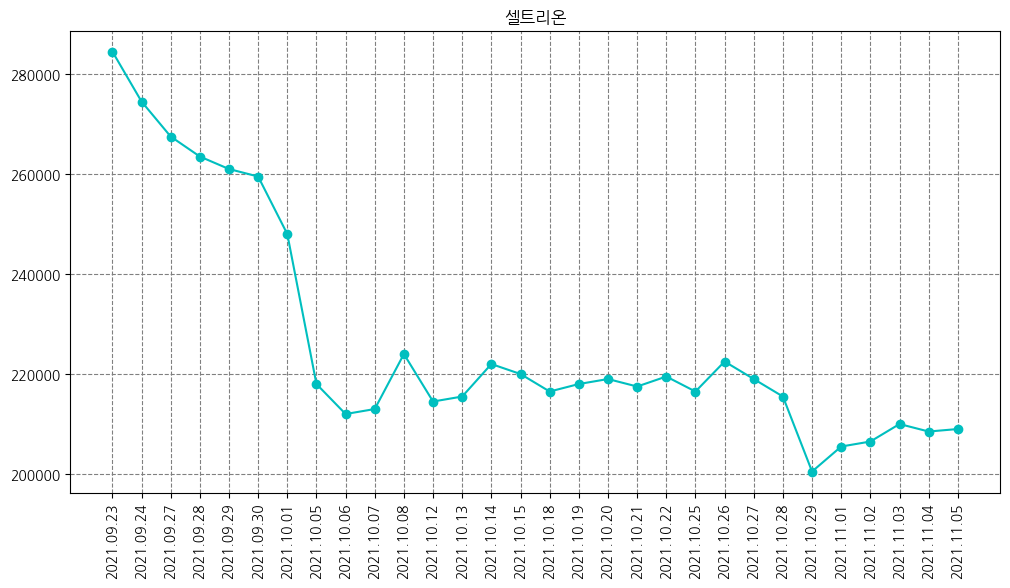

In [39]:
df_mini = df.iloc[0:30]
df_mini = df_mini.sort_values(by='날짜')

mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 안깨지게 하는 기능
plt.rc('font', family='NanumGothic')         # 한글 안깨지게 하는 방법
plt.figure(figsize=(12,6))
plt.title('셀트리온')
plt.xticks(rotation=90)
plt.plot(df_mini['날짜'],df_mini['종가'],'co-')
plt.grid(color='gray',linestyle='--')
plt.show()

30일치 데이터만 취하여  matplotlib.pyplot 으로 챠트생성

In [36]:
df_mini = df.iloc[0:250]
df_mini = df_mini.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume'})
df_mini = df_mini.sort_values(by='Date')
df_mini.index = pd.to_datetime(df_mini.Date)
df_mini = df_mini[['Open','High','Low','Close','Volume']]


250일치 데이터를 가지고 mplfinance 챠트를 그리기 위한 데이터프레임을 생성한다.

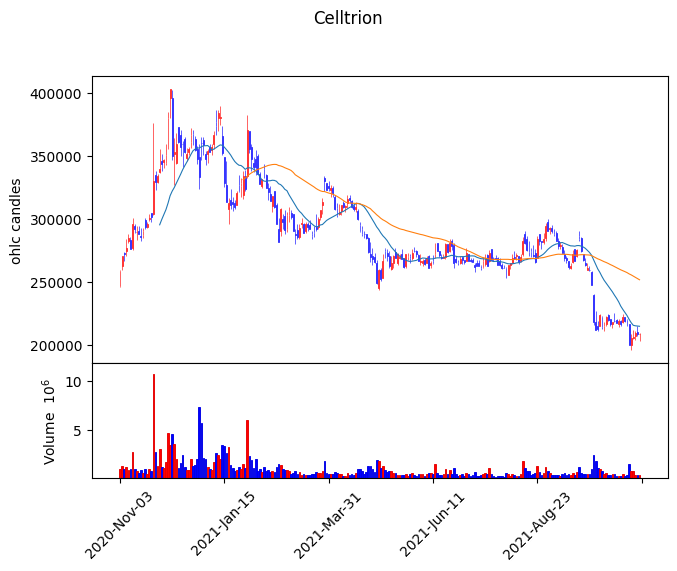

In [38]:
import mplfinance as mpf
kwargs = dict(title='Celltrion',type='candle',mav=(20,60), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df_mini,**kwargs,style=s)

mplfinance 로 챠트생성     
- 20, 60 이평선 표시     
- 거래량 챠트 포함     
- 한글이 깨지는데 구글링해도 아직 알려진 해법이 없는것으로 보인다.     
- 참고( https://github.com/matplotlib/mplfinance )    